In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import random
import seaborn as sns
%matplotlib inline

In [2]:
# Load and read raw csv files into dataframes, then merge together
# first csv file
city_df = pd.read_csv("../05-Matplotlib/Homework05/Instructions/Pyber/raw_data/city_data.csv")
# second csv file 
ride_df = pd.read_csv("../05-Matplotlib/Homework05/Instructions/Pyber/raw_data/ride_data.csv")
# merged df, (city_df then ride_df)
pyber_df = pd.merge(city_df, ride_df)

In [3]:
# Work off pyber_df (merged df), and create variables to be values in Dictionary
# city = pyber_df.groupby('city').count()
citytype = pyber_df.groupby('city')['type'].unique().str.get(0)
drivers = pyber_df.groupby('city')['driver_count'].unique().str.get(0)
avefare = pyber_df.groupby('city')['fare'].mean()
totalride = pyber_df.groupby('city')['ride_id'].count()

In [4]:
# Turn dictionary into new dataframe
pybersummary_df = pd.DataFrame({"Average Fare per City ($)":avefare, 
                                "Total Rides per City":totalride,
                                "Driver Count":drivers, 
                                "Type":citytype})
pybersummary_df.head()

,Average Fare per City ($),Driver Count,Total Rides per City,Type
city,,,,
Alvarezhaven,23.928710,21,31,Urban
Alyssaberg,20.609615,67,26,Urban
Anitamouth,37.315556,16,9,Suburban
Antoniomouth,23.625000,21,22,Urban
Aprilchester,21.981579,49,19,Urban


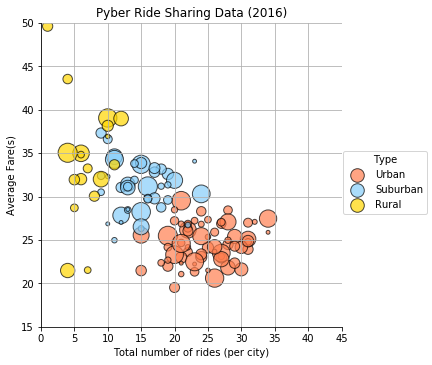

In [5]:
colors=['#FF7F50','#87CEFA','#FFD700']
sns.lmplot(x="Total Rides per City",
          y="Average Fare per City ($)",
          data = pybersummary_df,
          fit_reg=False,
          hue= "Type",
         palette = colors,
         scatter_kws={"s": drivers*5,
                      "alpha":0.7,
                      "linewidth":1,
                      "edgecolor":"black"
                     })
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylim(15,50)
plt.xlim(0,45)
plt.xlabel("Total number of rides (per city)")
plt.ylabel("Average Fare(s)")
plt.grid()

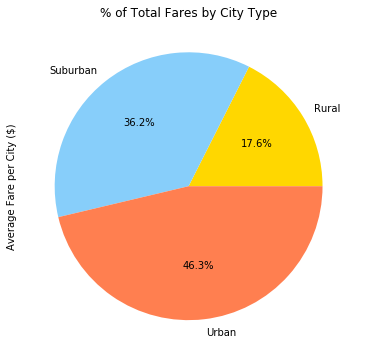

In [6]:
#% of Total Fares by City Type
fares_citytype = pybersummary_df.groupby('Type')['Average Fare per City ($)'].sum()
plt.axis("equal")
fare_citychart = fares_citytype.plot(kind='pie', figsize=(6,6), title="% of Total Fares by City Type", 
                                     autopct="%1.1f%%", colors=('#FFD700','#87CEFA','#FF7F50'))

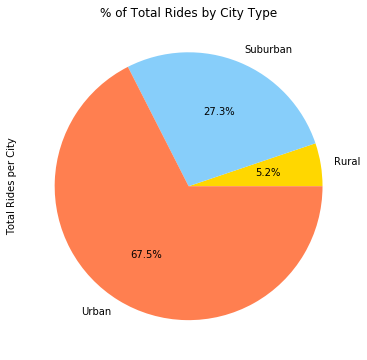

In [7]:
#% of Total Fares by City Type
fares_citytype = pybersummary_df.groupby('Type')['Total Rides per City'].sum()
plt.axis("equal")
fare_citychart = fares_citytype.plot(kind='pie', figsize=(6,6), title="% of Total Rides by City Type", 
                                     autopct="%1.1f%%", colors=('#FFD700','#87CEFA','#FF7F50'))

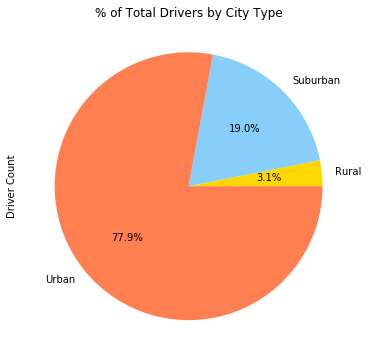

In [8]:
#% of Total Fares by City Type
fares_citytype = pybersummary_df.groupby('Type')['Driver Count'].sum()
plt.axis("equal")
fare_citychart = fares_citytype.plot(kind='pie', figsize=(6,6), title="% of Total Drivers by City Type", 
                                     autopct="%1.1f%%", colors=('#FFD700','#87CEFA','#FF7F50'))